# Ensemble Learning Exploration

This learning activity will focus several items:
* The theory of using ensembles of weak learners to create a strong learner
* The concepts of combining bootstrapping and feature subsets to decorrelate learners

The student coding activity will allow you to explore 2 of the things that affect the performance of an ensemble of weak learners - the underlying performance of an individual leaner and the quantity of learners in the ensemble

The takeaway from this activity is that assuming each individual model is slightly better than chance, the number of models required for an ensemble to have reasonable, and perhaps even great performance is not as many as you might think... and if the learners are decently better than chance, a relatively small-sized ensemble is large enough to get very good performance.


In [1]:
from __future__ import print_function

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

# from sklearn import tree
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import mean_squared_error

# from mpl_toolkits.mplot3d import Axes3D

# Weak Learners -> Strong learning

### Weak Learner Definition
Suppose we define a weak learner as a model that answers a Binary ML classification problem correctly 51% of the time (just better than chance)

We can demonstrate the accuracy of a single learner on a classification problem like this on 10000 observations

In [2]:
my_seed=42
rng = np.random.RandomState(my_seed)


In [3]:
learner_count = 1
correct_proba = 0.51
observation_count = 10000

rng = np.random.RandomState(my_seed)  #note that you need to restart the generator if you want the cell to give you the same values

#collect the booleans on whether the learner got it right or not
got_it_right = (rng.rand(observation_count, learner_count) < correct_proba).astype(int)
#print the number of correct, incorrect, and accuracy score
correct = np.sum(got_it_right)
incorrect = np.sum(1-got_it_right)
accuracy = correct/(correct+incorrect)

tabledata = np.array([[accuracy,correct,incorrect]])
df=pd.DataFrame(tabledata, columns=["Accuracy","Correct","Incorrect"])
df.index.names=['Model #']
display(df)

,Accuracy,Correct,Incorrect
Model #,,,
0,0.5194,5194.0,4806.0


Now lets suppose that we had 9 of these weak learners, each with 51% accuracy, but lets suppose that the learners are *independent* models - their errors (which observations they make mistakes on) is uncorrelated.

In [4]:
learner_count = 9
correct_proba = 0.51
observation_count = 10000
rng = np.random.RandomState(my_seed)  #note that you need to restart the generator if you want the cell to give you the same values


mult_got_it_right = (rng.rand(observation_count, learner_count) < correct_proba).astype(np.int32)
#print the number of correct, incorrect, and accuracy score
mult_correct = np.sum(mult_got_it_right,axis=0)
mult_incorrect = np.sum(1-mult_got_it_right,axis=0)
mult_accuracy = mult_correct/(mult_correct+mult_incorrect)
tabledata = np.array([mult_accuracy,mult_correct,mult_incorrect]).T
df = pd.DataFrame(tabledata, columns=["Accuracy","Correct","Incorrect"])
df.index.names=['Model ID']
display(df)

,Accuracy,Correct,Incorrect
Model ID,,,
0,0.5020,5020.0,4980.0
1,0.5107,5107.0,4893.0
2,0.5102,5102.0,4898.0
3,0.5051,5051.0,4949.0
4,0.5109,5109.0,4891.0
5,0.5082,5082.0,4918.0
6,0.5217,5217.0,4783.0
7,0.5127,5127.0,4873.0
8,0.5052,5052.0,4948.0


We can see that each weak learner got around 51% accuracy on the whole dataset.   

Next, lets display some of these correct observation predictions as a heatmap to ensure they are independent

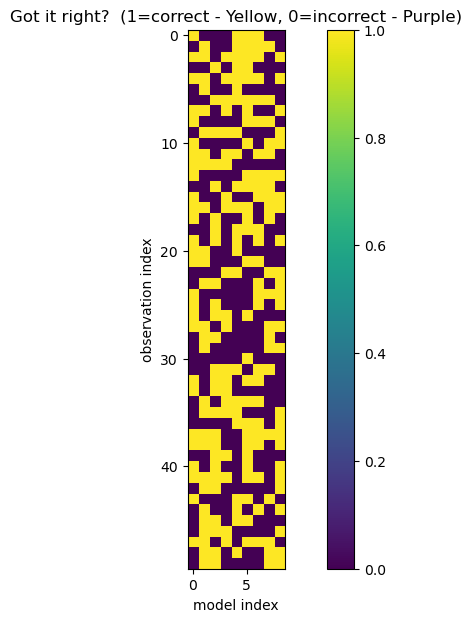

In [5]:
# print(mult_got_it_right.shape)
# print(mult_got_it_right[0:50,:])
plt.figure(figsize=(11,7))
plt.imshow(mult_got_it_right[0:50,:])
plt.ylabel("observation index")
plt.xlabel("model index")
plt.title("Got it right?  (1=correct - Yellow, 0=incorrect - Purple)")
plt.colorbar()
plt.show()

As we can see, the correctnesses of the models appear to be uncorrelated (which would appear as horizontal striping instead of noisy samples in the heatmap above)

Can we do better than ~51% accuracy by using the aggregation of all of these weak learners?

Lets make a voting scheme such that we do a majority vote on each observation.  If more than half of the learners got the observation right then that means our vote would have been a correct prediction, otherwise it will be an incorrect prediction on that observation.

then we can take a look at how well we did on the predictions overall.

In [6]:
#how many models got each observation prediction right ?
obs_count_got_it_right = np.sum(mult_got_it_right,axis=1,keepdims=True)  #keep as a numpy array

#if number of models getting right greater than half, then the ensemble predicted correctly
obs_vote_correct = obs_count_got_it_right>np.floor(learner_count/2)
ensemble_obs_correct = np.sum(obs_vote_correct)
ensemble_obs_incorrect = np.sum(1-obs_vote_correct)
ensemble_accuracy = ensemble_obs_correct/(ensemble_obs_correct+ensemble_obs_incorrect)
print("Ensemble Accuracy = ",ensemble_accuracy)


Ensemble Accuracy =  0.5245


Hmmm... maybe slightly better with 9 models... what if we had more models?  lets make a function to help explore this

### Helper function to evaluate ensembles of various quantities of models and weak learner performances

In [7]:
def eval_ensemble(model_count=1,obs_count=10000,learner_prob = 0.51, my_seed=my_seed):
    np.random.RandomState(my_seed)
    mult_got_it_right = (rng.rand(observation_count, model_count) < learner_prob).astype(np.int32)
    obs_count_got_it_right = np.sum(mult_got_it_right,axis=1,keepdims=True)  #keep as a numpy array

    #if number of models getting right greater than half, then the ensemble predicted correctly
    obs_vote_correct = obs_count_got_it_right>np.floor(model_count/2)
    ensemble_obs_correct = np.sum(obs_vote_correct)
    ensemble_obs_incorrect = np.sum(1-obs_vote_correct)
    ensemble_accuracy = ensemble_obs_correct/(ensemble_obs_correct+ensemble_obs_incorrect)
    return ensemble_accuracy

# STUDENT CODING

## STEP 1 (STUDENT VARIABLE SELECTION REQUIRED)

The code below calls ```ensemble_accuracies``` with a quantity of weak learners to use in the ensemble.  

For example, if you wanted to evaluate the performance of ensembles with 9, 21, and 51 models, use a line of code like this to set the model counts to explore:

```model_counts = np.array([9,21,51])```

### Your task:
Assuming (very) weak learners which have only 51% accuracy, how many of weak learners does it take to exceed an ensemble vote (over all observations) which exceeds 60% accruacy?  exceeds 70% accuracy?  Can you make an ensemble of these weak learners that gets even higher accuracy?


In [8]:

#fill out the array below with ensemble sizes beyond those shown.

#example:
# model_counts = np.array([9,11]) 

#this example would set the inputs to request
#a result for a 9-model ensemble and an 11-model ensemble


#----------STUDENT CODE MODIFICATION HERE-------------

model_counts = np.array([9,21,51,201,501,1001,5001])  #sizes of the ensembles to try
#note we are using odd numbers to prevent ties

#----------END STUDENT CODE MODIFICATION -------------

ensemble_accuracies = np.zeros(model_counts.shape)
for idx,mc in enumerate(model_counts):
    ensemble_accuracies[idx] = eval_ensemble(model_count=mc, learner_prob=0.51)

tabledata = np.array([model_counts,ensemble_accuracies]).T
df = pd.DataFrame(tabledata, columns=["Model Count","Ensemble Accuracy"])
df["Model Count"] =df["Model Count"].astype(int)
# display(df.style.hide_index()) 
# display(df.Styler.hide(axis='index') )
display(df) 


,Model Count,Ensemble Accuracy
0,9,0.5250
1,21,0.5373
2,51,0.5552
3,201,0.6156
4,501,0.6765
5,1001,0.7304
6,5001,0.9249


## STEP 2 (STUDENT VARIABLE SELECTION REQUIRED)

The next code block evaluates a fixed quantity of models (101) and allows you to select various levels of accuracy for the individual learners to explore the performance of an ensemble.  For example if you wanted to explore both 51% accuracy and 52% accuracy learners in the ensemble your line of code would look like this:

```learner_probs = np.array([0.51,0.52])  ```


### Your task:
Assuming a fixed quantity of weak learner models (101), how good do each of the weak learners have to be such that an ensembles composed of these 101 models will achieve above 90% accuracy?  Above 98% accuracy?

What happens if your learners have below-chance accuracy?  (e.g. 49% accuracy or below)

In [9]:
mc = 101  # <<<<<< DONT CHANGE THIS LINE !!!!! >>>>>>>




#fill out the array below with learner probabilities beyond those shown.
#example:

#learner_probs = np.array([0.51,0.52])  #weak learner accuracies to try for 0.51 and 0.52 accuracy weak models



#----------STUDENT CODE MODIFICATION HERE-------------

learner_probs = np.array([0.51,0.52,0.59,0.65])  #weak learner accuracies to try

#----------END STUDENT CODE MODIFICATION -------------

ensemble_accuracies = np.zeros(learner_probs.shape)
for idx,lp in enumerate(learner_probs):
    ensemble_accuracies[idx] = eval_ensemble(model_count=mc, learner_prob=lp)

    
tabledata = np.array([learner_probs,ensemble_accuracies]).T
df = pd.DataFrame(tabledata, columns=["Model Accuracy","Ensemble Accuracy"])
# display(df.style.hide_index())     
display(df)     


,Model Accuracy,Ensemble Accuracy
0,0.51,0.5858
1,0.52,0.6598
2,0.59,0.9657
3,0.65,0.9986
